# GEO1003 ~ Wi-Fi Fingerprinting

December 2023

Work by Tom Barbian (5100704), Der Derian Auliyaa Bainus (5941342), Corné Snoeij (5174473), Javier Martínez (6055613)

### Importing libraries

In [245]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

### Loading the data

##### Wi-Fi fingerprinting data

In [246]:
# load the files within folder /data/fingerprints into a list
wifi_path = os.getcwd() + '/data/fingerprints'
wifi_files = os.listdir(wifi_path)
wifi_files

['Hall V.txt',
 'HALL A.txt',
 'Ketelhuis side room.txt',
 'Hall U.txt',
 'Hall B.txt',
 'Hall C.txt',
 '.DS_Store',
 'HALL F.txt',
 'BK_library.txt',
 'HALL D.txt',
 'entrance west.txt',
 'HALL R.txt',
 'BG+ half-floor.txt',
 'Msc .txt',
 'libarary.csv',
 'Canteen.txt',
 'orangeroom.csv',
 'Serre .txt',
 'management stairs.txt',
 'BG oost 430.txt',
 'Geolab .txt',
 'Hall H .txt',
 'Hall Z .txt',
 'BG.OOSt.060.txt',
 'studentdest.csv',
 'Hall K.txt',
 'urbanism_hallway.csv',
 'Stairway (near Hall U) .txt',
 'hallQ.csv',
 'vrlab.txt',
 'K1.OOST.240_kelder atelier.txt',
 'bookshop.csv',
 'Cafeteria.txt',
 'HALL M.txt']

In [247]:
# load the files into a list of dataframes
df_dict = {}

for file in wifi_files:
    try:
        df_dict[file] = pd.read_csv(wifi_path + '/' + file, sep='\t', header=0)
        df_dict[file].rename(columns={df_dict[file].columns[0]: "timestamp"}, inplace=True)
        df_dict[file].insert(0, 'room', file)

    except Exception as e:
        print(f"error reading file {file}: {e}")
        continue

error reading file .DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte


In [250]:
df_dict['Hall Z .txt']

,room,timestamp,D0:4D:C6:F2:45:D1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,Unnamed: 4,Unnamed: 5,-88,20,0,Ch 56 [5.280 GHz],Unnamed: 10,"0 Stations, 14% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
0,Hall Z .txt,12/12/2023 13:22:50,D0:4D:C6:F2:B9:C1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-77,46,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 13% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
1,Hall Z .txt,12/12/2023 13:22:50,D0:4D:C6:F2:9A:61,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-80,38,0.0,Ch 1 [2.412 GHz],NaN,"0 Stations, 28% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
2,Hall Z .txt,12/12/2023 13:22:50,D0:4D:C6:F2:B9:B2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-83,31,0.0,Ch 40 [5.200 GHz],NaN,"0 Stations, 8% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
3,Hall Z .txt,12/12/2023 13:22:50,1C:28:AF:5B:8E:F2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-81,35,0.0,Ch 56 [5.280 GHz],NaN,"0 Stations, 17% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
4,Hall Z .txt,12/12/2023 13:22:50,1C:28:AF:5C:43:E2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-79,40,0.0,Ch 11 [2.462 GHz],NaN,"0 Stations, 76% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,Hall Z .txt,12/12/2023 13:40:55,D0:4D:C6:F2:B9:A0,"Aruba, a Hewlett Packard Enterprise Company",eduroam,NaN,NaN,-84,29,0.0,Ch 11 [2.462 GHz],NaN,"0 Stations, 14% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19906,Hall Z .txt,12/12/2023 13:40:55,1C:28:AF:5C:43:F1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-83,31,0.0,Ch 112 [5.560 GHz],NaN,"0 Stations, 7% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19907,Hall Z .txt,12/12/2023 13:40:55,D0:4D:C6:F2:92:C1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-83,31,1.0,Ch 1 [2.412 GHz],NaN,"1 Station, 40% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
19908,Hall Z .txt,12/12/2023 13:40:55,D0:4D:C6:F2:4F:D2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-88,20,0.0,Ch 40 [5.200 GHz],NaN,"0 Stations, 19% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]


In [251]:
df_dict['Hall V.txt']

,room,timestamp,MAC Address,Vendor,SSID,Access Point Name,Connected AP,Signal Strength,Quality,Station Count,Frequency,Position,Info,Adapter
0,Hall V.txt,8-12-2023 09:42:40,D0:4D:C6:F2:87:92,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-48,89,0.0,Ch 132 [5.660 GHz],NaN,"0 Stations, 8% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
1,Hall V.txt,8-12-2023 09:42:40,1C:28:AF:5B:83:F2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-79,40,0.0,Ch 108 [5.540 GHz],NaN,"0 Stations, 6% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
2,Hall V.txt,8-12-2023 09:42:40,D0:4D:C6:F2:C7:F0,"Aruba, a Hewlett Packard Enterprise Company",eduroam,NaN,NaN,-77,46,28.0,Ch 56 [5.280 GHz],NaN,"28 Stations, 22% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
3,Hall V.txt,8-12-2023 09:42:40,D0:4D:C6:F2:F2:12,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-78,43,0.0,Ch 40 [5.200 GHz],NaN,"0 Stations, 49% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
4,Hall V.txt,8-12-2023 09:42:41,4E:1B:86:4C:C4:97,Arcadyan Corporation,BWA-1CC496,NaN,NaN,-83,31,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 1% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11266,Hall V.txt,8-12-2023 09:57:49,D0:4D:C6:F2:C7:F2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-70,67,0.0,Ch 56 [5.280 GHz],NaN,"0 Stations, 11% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
11267,Hall V.txt,8-12-2023 09:57:49,D0:4D:C6:F2:F2:02,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-74,57,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 33% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
11268,Hall V.txt,8-12-2023 09:57:49,D0:4D:C6:F2:9A:62,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-79,40,0.0,Ch 1 [2.412 GHz],NaN,"0 Stations, 15% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]
11269,Hall V.txt,8-12-2023 09:57:49,D0:4D:C6:F2:9A:61,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-79,40,0.0,Ch 1 [2.412 GHz],NaN,"0 Stations, 15% Channel Utilization",Wi-Fi 2 [Intel(R) Dual Band Wireless-AC 8265 #2]


##### GNSS nmea data

In [254]:
# This function was coded by Lars, but modified to save to dataframe

def get_sat_values(filename):
    PDOP, HDOP, VDOP, latitude, longitude, num_used_satellites, altitude = [], [], [], [], [], [], []

    with open(filename, 'r') as file:
        lines = file.readlines()
        # divide messages
        messages = [lines[i:i + 7] for i in range(0, len(lines), 7)]

        for message in messages:
            PDOP.append(float(message[0].split(',')[15]))
            HDOP.append(float(message[0].split(',')[16]))
            VDOP.append(float(message[0].split(',')[17][:3]))
            latitude.append(float(message[6].split(',')[2:3][0]))
            longitude.append(float(message[6].split(',')[4:5][0]))
            num_used_satellites.append(int(message[6].split(',')[6]))
            altitude.append(float(message[6].split(',')[9:10][0]))

    # Create a DataFrame
    df = pd.DataFrame({
        'PDOP': PDOP,
        'HDOP': HDOP,
        'VDOP': VDOP,
        'latitude': latitude,
        'longitude': longitude,
        'num_used_satellites': num_used_satellites,
        'altitude': altitude
    })

    return df

In [255]:
# load the files within folder /data/fingerprints into a list
nmea_path = os.getcwd() + '/data/nmea'
nmea_files = os.listdir(nmea_path)
nmea_files

['Hall H nmea.log',
 'Stairway (near Hall U) nmea.log',
 'Hall Z nmea.log',
 'Hall K nmea.log',
 'nmea data hall B08 Hall B (1).log']

In [256]:
# load the nmea files into a list of dataframes
nmea_dict = {}

for file in nmea_files:
    nmea_dict[file] = get_sat_values(nmea_path + '/' + file)
    # divide latitude and longitude by 100 to get the correct value
    nmea_dict[file]['latitude'] = nmea_dict[file]['latitude'] / 100
    nmea_dict[file]['longitude'] = nmea_dict[file]['longitude'] / 100
    nmea_dict[file]['ID'] = file

In [257]:
nmea_dict['Hall K nmea.log']

,PDOP,HDOP,VDOP,latitude,longitude,num_used_satellites,altitude,ID
0,11.2,10.5,3.8,52.003689,4.222611,12,1.1,Hall K nmea.log
1,7.7,7.0,3.2,52.003696,4.222625,12,1.0,Hall K nmea.log
2,7.5,7.0,2.8,52.003697,4.222627,12,1.0,Hall K nmea.log
3,7.5,7.0,2.6,52.003697,4.222627,12,1.1,Hall K nmea.log
4,7.4,7.0,2.3,52.003697,4.222627,12,1.0,Hall K nmea.log
...,...,...,...,...,...,...,...,...
166,7.0,7.0,0.5,52.003688,4.222605,12,1.3,Hall K nmea.log
167,7.0,7.0,0.5,52.003692,4.222613,12,1.3,Hall K nmea.log
168,7.0,7.0,0.5,52.003701,4.222623,12,1.3,Hall K nmea.log
169,7.0,7.0,0.5,52.003701,4.222625,12,1.3,Hall K nmea.log


### A. Radio Mapping Phase

BK-City floor plan can be found [here.](https://www.tudelft.nl/bk/over-faculteit/het-gebouw/plattegrond/)

##### A1. Scatterplots of GNSS accuracy
Illuminate the estimated GNSS accuracy of this indoor location through a visual representation in
a scatterplot. Don't forget to include key metrics like standard deviation, HDOP, and VDOP.

In [258]:
def print_statistics(dict):
    # Create table with mean, std of lat, lon, HDOP, VDOP, PDOP for each measurement
    statistics_dfs = []
    for key, value in dict.items():
        # Calculate the mean and std for each dataframe
        statistics_df = value.groupby('ID').agg({
            'latitude': ['mean', 'std'],
            'longitude': ['mean', 'std'],
            'HDOP': ['mean', 'std'],
            'VDOP': ['mean', 'std'],
            'PDOP': ['mean', 'std']
        }).reset_index()
        # Add the measurement name to the dataframe at first column
        statistics_df.insert(0, 'measurement', key)
        statistics_dfs.append(statistics_df)

    result_df = pd.concat(statistics_dfs, axis=0)
    result_df = result_df.drop(columns=['ID'], level=0)

    return result_df

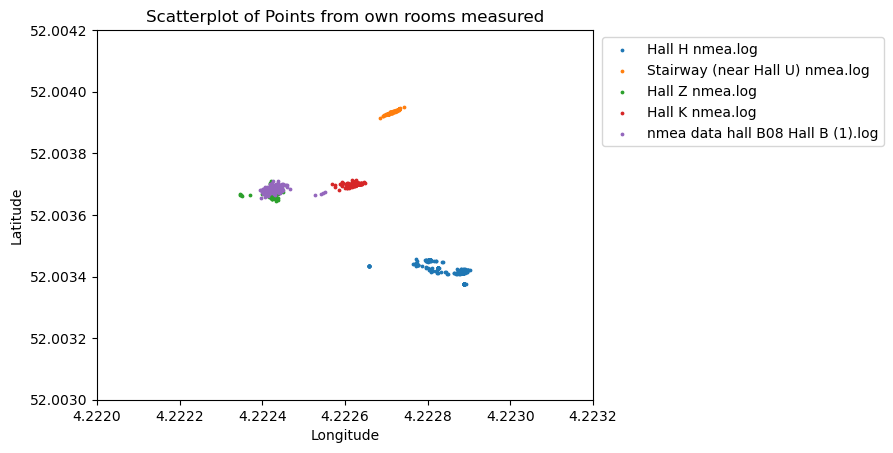

In [259]:
# plot latitude and longitude for each of the nmea files in one scatterplot with different colors
for key, df in nmea_dict.items():
    plt.scatter(df['longitude'], df['latitude'], label=key, s=3)

plt.xlim(4.222, 4.2232)
plt.ylim(52.003, 52.0042)

plt.ticklabel_format(useOffset=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Points from own rooms measured')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

# Show the plot
plt.show()

In [260]:
print("Statistics table")
print_statistics(nmea_dict)

Statistics table


measurement   latitude           longitude            \
                                           mean       std      mean       std   
0                    Hall H nmea.log  52.003425  0.000023  4.222848  0.000044   
0    Stairway (near Hall U) nmea.log  52.003934  0.000007  4.222715  0.000012   
0                    Hall Z nmea.log  52.003673  0.000011  4.222423  0.000015   
0                    Hall K nmea.log  52.003700  0.000004  4.222622  0.000013   
0  nmea data hall B08 Hall B (1).log  52.003683  0.000010  4.222427  0.000023   

       HDOP                VDOP                PDOP            
       mean       std      mean       std      mean       std  
0  1.667746  1.327621  0.475777  0.465847  1.771632  1.368019  
0  7.193913  0.744723  1.138261  0.664723  7.292174  0.815007  
0  7.155618  0.860690  1.206180  0.783600  7.280337  0.935735  
0  7.020468  0.267652  0.815205  0.505386  7.069006  0.332952  
0  7.219620  0.979436  1.947468  0.758031  7.510127  1.062457

##### A2. Comparison of Wi-Fi fingerprinting from two proximate (geographically) locations
Gauge the degree of similarity between these fingerprints. Alternatively, on a broader scale, assess
the 'distance' between the 32 identifiable places in RSS-space. In essence, explore how
distinguishable these places are from each other.

We would like to assess the degree of similarity between two rooms: ROOM M and ROOM H, those rooms are next to each other in the BK building. First we show the averages of each of their two fingerprints.

In [262]:
# Extract Wi-Fi fingerprints for the two rooms
hall_m_df = df_dict['HALL M.txt']
hall_h_df = df_dict['Hall H .txt']

# Select relevant columns for comparison
selected_columns = ['Signal Strength', 'Quality', 'Station Count']

# Handling NaN values by filling them with the mean of the column
hall_m_df = hall_m_df[selected_columns].fillna(hall_m_df[selected_columns].mean())
hall_h_df = hall_h_df[selected_columns].fillna(hall_h_df[selected_columns].mean())

# Extract features for halls M and H
hall_m_features = hall_m_df[selected_columns].to_numpy()
hall_h_features = hall_h_df[selected_columns].to_numpy()

# Calculate averages and standard deviations
hall_m_avg = hall_m_df.mean()
hall_h_avg = hall_h_df.mean()
hall_m_std = hall_m_df.std()
hall_h_std = hall_h_df.std()

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'Hall M Avg': hall_m_avg,
    'Hall H Avg': hall_h_avg,
    'Hall M Std': hall_m_std,
    'Hall H Std': hall_h_std
})

# Display the dataframe
comparison_df

,Hall M Avg,Hall H Avg,Hall M Std,Hall H Std
Signal Strength,-75.262687,-74.924231,9.871511,10.497912
Quality,50.408012,50.614977,22.616157,23.772682
Station Count,0.544799,1.650607,1.552446,3.955809


Also, we can assess the 'distance' between the rooms in RSS-space by using PCA. It is performed below.

In [264]:
from sklearn.decomposition import PCA

# Concatenate all DataFrames into one for analysis
df = pd.concat(df_dict.values(), keys=df_dict.keys())

# Pivot the table for easy manipulation
df_pivot = df.pivot_table(index='timestamp', columns='MAC Address', values='Signal Strength')

# Fill missing values with 0
df_pivot = df_pivot.fillna(0)

# Perform Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pivot)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add room labels to the DataFrame
df_pca['Room'] = df_pivot.index.get_level_values(0)

In [ ]:
# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Room', data=df_pca, palette='viridis')
plt.title('PCA Analysis of WiFi Fingerprints')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()